# Word Clouds - general COVID19 dataset (wcloud_nocovid.py and wcloud_nocovidimage.py)

In order to create the word clous, we need the following packages:

In [1]:
import pandas as pd
import numpy as np
import json
import sys
import string
import re
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import emoji
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
from PIL import Image
import nltk
from nltk.corpus import stopwords

Then we've defined some functions to clean the tweet's text

In [2]:
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_urls(text):
    result = re.sub(r"http\S+", "", text)
    return(result)

def remove_twitter_urls(text):
    clean = re.sub(r"pic.twitter\S+", "",text)
    return(clean)

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def noamp(text):
    clean = re.sub("&amp", " ",text)
    return (clean)

To read the JSON file that has all the tweets, it is necessary to do:

In [3]:
data = []
with open('general_result.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))


Then we get

In [4]:
data

[{'created_at': 'Tue Jan 14 00:28:51 +0000 2020',
  'id': 1216879817624211456,
  'id_str': '1216879817624211456',
  'full_text': '@kpophappenings_ kim jaehyun from n.flying\nhttps://t.co/RkcDuyDM4r',
  'truncated': False,
  'display_text_range': [17, 66],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'kpophappenings_',
     'name': 'BEST THING THAT HAPPENED IN KPOP',
     'id': 1184078064063401987,
     'id_str': '1184078064063401987',
     'indices': [0, 16]}],
   'urls': [],
   'media': [{'id': 1133933150571130881,
     'id_str': '1133933150571130881',
     'indices': [43, 66],
     'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1133933150571130881/pu/img/eEH12Brr6fzyYIST.jpg',
     'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1133933150571130881/pu/img/eEH12Brr6fzyYIST.jpg',
     'url': 'https://t.co/RkcDuyDM4r',
     'display_url': 'pic.twitter.com/RkcDuyDM4r',
     'expanded_url': 'https://twitter.com/fluffyhweseung/st

Then we filter the JSON file, we've added extra stopwords to avoid some of the most common COVID19 words

In [5]:
index=0
#new = []
comment_words = ''
stop_words_es = stopwords.words('spanish')
stop_words_en = stopwords.words('english') + ["COVID19", "Coronavirus", "Corona", "Covid_19", "COVID","CoronaVirusOutbreak","COVID2019","virus"]
stop_words = stop_words_en + stop_words_es
for element in data:
    data[index]['full_text'] = data[index]['full_text'].lower()#new - metto tutto minuscolo
    #data[index]['full_text'] = contractions.fix(data[index]['full_text'])
    data[index]['full_text'] = re.sub("\'\w+", '', data[index]['full_text'])#new - rimuove tutto quello dopo '
    data[index]['full_text'] = remove_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_twitter_urls(data[index]['full_text'])
    data[index]['full_text'] = remove_emoticons(data[index]['full_text'])
    data[index]['full_text'] = remove_emoji(data[index]['full_text'])
    data[index]['full_text'] = give_emoji_free_text(data[index]['full_text'])
    data[index]['full_text'] = noamp(data[index]['full_text'])#new - no amp con lo spazio
    data[index]['full_text'] = re.sub("#\S+", " ",  data[index]['full_text'])#new - remove hashtag
    data[index]['full_text'] = re.sub("@\S+", " ",  data[index]['full_text'])#new - no mentions
    data[index]['full_text'] = data[index]['full_text'].translate(str.maketrans('', '', string.punctuation))#new - no puntuaction
    data[index]['full_text'] = data[index]['full_text'].encode('ascii', 'ignore').decode()#new - no unicode
    data[index]['full_text'] = re.sub("rt", " ", data[index]['full_text'])#new - no RT
    data[index]['full_text'] = re.sub('\s{2,}', " ", data[index]['full_text'])#new - remove big spaces

    
    tokens=data[index]['full_text'].split()

    comment_words += " ".join(tokens)+" "
    index=index+1

Then it's time to plot the word cloud

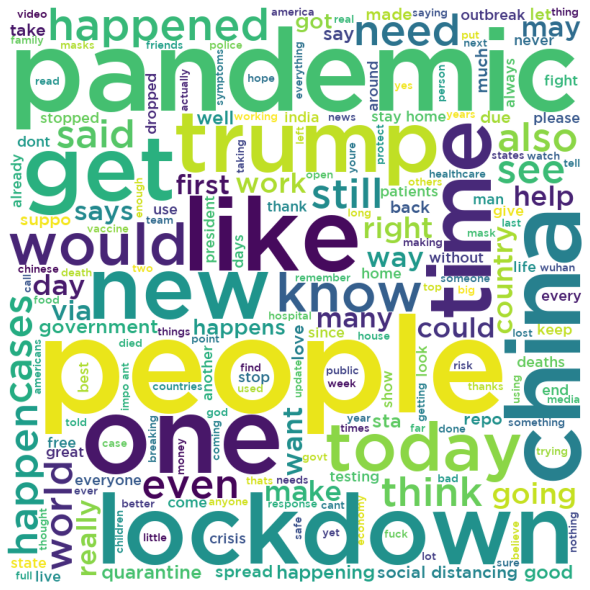

In [6]:
wordcloud = WordCloud(width = 800, height = 800, 
               background_color ='white', 
                stopwords = stop_words, 
                normalize_plurals=False,
                min_word_length = 3,
                font_path = 'GothamMedium.ttf',
               min_font_size = 10).generate(comment_words) 
  
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

As shown before, it's possible to shape the word cloud with a mask. This time we've used the twitter logo:

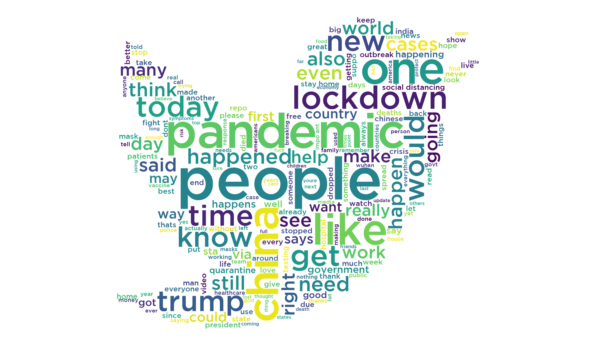

In [7]:
mask= np.array(Image.open('twitter.jpg'))

wordcloud_image = WordCloud(background_color ='white',
            mask=mask,
            width=mask.shape[1],
            height=mask.shape[0],          
            stopwords = stop_words, 
            normalize_plurals=False,
            min_word_length = 3,
            font_path = 'GothamMedium.ttf',
            min_font_size = 10).generate(comment_words) 
  
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_image,interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 